## Non-negative Matrix Factorization

### Import data

In [2]:
import json

with open('preprocessing/data.json', 'r') as f:
    documents = json.load(f)
    texts = [' '.join([word for word in text]) for text in documents]

In [3]:
import pandas as pd

# Convert to DataFrame
df = pd.DataFrame(texts, columns=['headline_text'])
df.head()

,headline_text
0,апрель год коллаборация телескоп горизонт собы...
1,быстрый радиовсплеск год пора астрофизик удовл...
2,долгий время реакция циклоприсоединение реакци...
3,учёный чехия франция помощь метод трёхмерный д...
4,клетка друг друг помощь химический сигнал веще...


### Show the word count

In [4]:
def word_count(text):
    return len(str(text).split(' '))

# Get the word count
df['word_count'] = df['headline_text'].apply(word_count)

# Descriptive statistics for word count
df['word_count'].describe()

count    2289.000000
mean      619.721276
std       330.990014
min        25.000000
25%       428.000000
50%       552.000000
75%       715.000000
max      4429.000000
Name: word_count, dtype: float64

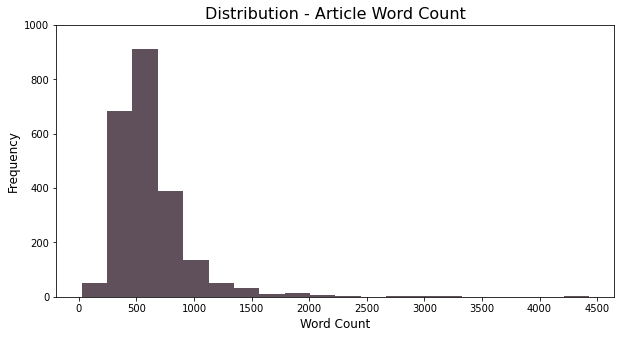

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Plot a hist of the word counts
fig = plt.figure(figsize=(10, 5))

plt.hist(df['word_count'], bins=20, color='#60505C')

plt.title('Distribution - Article Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(np.arange(0, 1200, 200))
plt.xticks(np.arange(0, 5000, 500))

plt.show()

### Build the TF-IDF matrix

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Filter out tokens using TF-IDF
vect = TfidfVectorizer(min_df=.01, max_df=.2)

# Fit and transform
X = vect.fit_transform(df.headline_text)

### Initialize and run the NMF model

In [19]:
from sklearn.decomposition import NMF

# Create an NMF instance
nmf_model = NMF(n_components=20, random_state=42, max_iter=1500)
 
# Fit the model to TF-IDF
nmf_model.fit(X)
 
# Transform the TF-IDF
nmf_features = nmf_model.transform(X)

In [21]:
# Create a dataframe
components_df = pd.DataFrame(nmf_model.components_, columns=vect.get_feature_names_out())

### Get the words of the highest value for each topic

In [22]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:' +
          f'\n{tmp.nlargest(15)}\n')

For topic 1 the words with the highest value are:
атмосфера        2.831383
вымирание        2.030605
углерод          1.844443
океан            1.668768
лёд              1.643313
кислород         1.457132
газ              1.424054
содержание       1.412869
климат           1.329134
глобальный       1.133252
морской          1.117936
климатический    1.084278
планета          1.066443
потепление       1.051229
порода           0.927036
Name: 0, dtype: float64

For topic 2 the words with the highest value are:
самец             1.569764
самка             1.464752
половой           0.276744
пол               0.232159
потомство         0.201399
спаривание        0.200933
партнёр           0.179067
репродуктивный    0.158289
яйцо              0.148015
сперматозоид      0.146173
ухаживание        0.135844
успех             0.121021
брачный           0.118697
выбор             0.111412
полова            0.109058
Name: 1, dtype: float64

For topic 3 the words with the highest value are:
элект

### Get the topic of a document

In [23]:
# Look at the nth document
n = 3

# doc = df.headline_text[n]
# print(doc)

pd.DataFrame(nmf_features).loc[n].idxmax() + 1

3

### Get the number of documents for each topic 

In [24]:
pd.DataFrame(nmf_features).idxmax(axis=1).value_counts()

2     180
4     167
12    159
1     152
9     147
19    141
3     132
14    131
10    124
5     123
11    122
6     109
18    107
7      92
13     82
17     73
8      66
16     63
0      61
15     58
dtype: int64

### Visualize the topics

In [25]:
def get_topics(components):
    topic_word_list = []
    for _, comp in enumerate(components):
        terms_comp = zip(vect.get_feature_names_out(), comp)
        sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
        topic = ''
        for t in sorted_terms:
            topic += ' ' + t[0]
        topic_word_list.append(topic)
    return topic_word_list

topic_word_list = get_topics(nmf_model.components_)

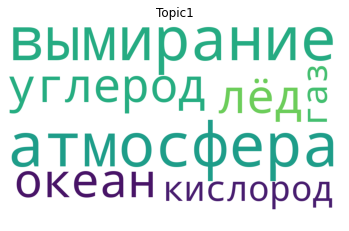

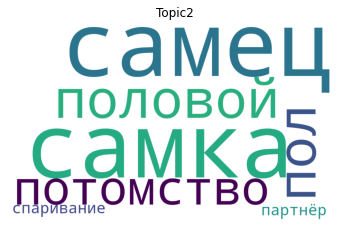

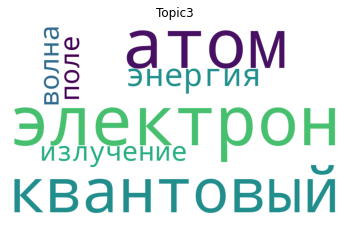

In [27]:
from wordcloud import WordCloud

for i in range(3):
  wc = WordCloud(width=1000, height=600, margin=3, prefer_horizontal=0.7, \
                 scale=1, background_color='white', relative_scaling=0).generate(topic_word_list[i])
  plt.imshow(wc)
  plt.title(f"Topic{i+1}")
  plt.axis("off")
  plt.show()